In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

simpleclean = pd.read_csv("origin_simpleclean.csv", names=["origin", "cleaned"], header=None)
simpleclean

,origin,cleaned
0,http://017uk.cf/2015/07/,017ukcf201507
1,http://1000.menu/catalog/pasternak,1000menucatalogpasternak
2,http://1007.show758.com/,1007show758com
3,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,1008643rmsncomldDvQPxAuuXlOKv4UvMDiEi4jVUCUwsO...
4,http://1019ampradio.cbslocal.com/tag/johnny-gi...,1019ampradiocbslocalcomtagjohnnygill2
...,...,...
60740,https://zh.wikipedia.org/wiki/Category:%E8%82%...,zhwikipediaorgwikiCategoryE882B2E7A9BAE59CB0E7...
60741,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,zhwikipediaorgzhhkE5A19EE588A9E7B1B3E880B6E6B8...
60742,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,zhwikipediaorgzhtwE6ADA3E7BEA9E881AFE79B9F
60743,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,zhwiktionaryorgwikiD181D0BDD0BED188D0B5D0BDD0B...


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

cityhash = pd.read_csv("hashValue.csv", names=["cleaned", "hashed64", "hashed32"], header=None)
cityhash = cityhash[1:].reset_index().drop(["index", "cleaned"], axis=1)
cityhash["origin"] = simpleclean.origin
cityhash

,hashed64,hashed32,origin
0,3783912110831711346,3125313391,http://017uk.cf/2015/07/
1,5300813359538710895,793414369,http://1000.menu/catalog/pasternak
2,11422281108340902114,1243599082,http://1007.show758.com/
3,12915854759455511776,188965143,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...
4,5335838774737003981,4111422892,http://1019ampradio.cbslocal.com/tag/johnny-gi...
...,...,...,...
60740,17887960937514528877,4138890155,https://zh.wikipedia.org/wiki/Category:%E8%82%...
60741,5260684397770811335,3272029432,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...
60742,7521832505671866256,1137507973,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...
60743,10083004426850841982,4255056740,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...


In [3]:
cityhash["origin size"] = cityhash.origin.apply(lambda x : len(x))
cityhash["hashed64 size"] = cityhash.hashed64.apply(lambda x : len(x))
cityhash["hashed32 size"] = cityhash.hashed32.apply(lambda x : len(x))
cityhash

,hashed64,hashed32,origin,origin size,hashed64 size,hashed32 size
0,3783912110831711346,3125313391,http://017uk.cf/2015/07/,24,19,10
1,5300813359538710895,793414369,http://1000.menu/catalog/pasternak,34,19,9
2,11422281108340902114,1243599082,http://1007.show758.com/,24,20,10
3,12915854759455511776,188965143,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,236,20,9
4,5335838774737003981,4111422892,http://1019ampradio.cbslocal.com/tag/johnny-gi...,51,19,10
...,...,...,...,...,...,...
60740,17887960937514528877,4138890155,https://zh.wikipedia.org/wiki/Category:%E8%82%...,75,20,10
60741,5260684397770811335,3272029432,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,94,19,10
60742,7521832505671866256,1137507973,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,67,19,10
60743,10083004426850841982,4255056740,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,79,20,10


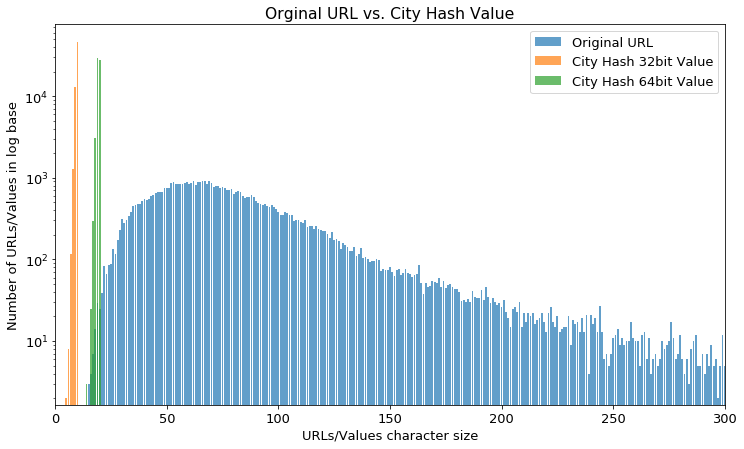

In [4]:
import matplotlib 
import matplotlib.pyplot as plt
font = {'size' : 13}

plt.rc('font', **font)

plt.figure(figsize=(12,7))
plt.xlabel('URLs/Values character size')
plt.title("Orginal URL vs. City Hash Value")
plt.ylabel('Number of URLs/Values in log base')
plt.xlim(right = 300)
plt.yscale("log")
plt.bar(list(cityhash.groupby("origin size").count().index), list(cityhash.groupby("origin size")["origin"].count()), alpha = 0.7)
plt.bar(list(cityhash.groupby("hashed32 size").count().index), list(cityhash.groupby("hashed32 size")["origin"].count()), alpha = 0.7)
plt.bar(list(cityhash.groupby("hashed64 size").count().index), list(cityhash.groupby("hashed64 size")["origin"].count()), alpha = 0.7)
plt.legend(('Original URL', 'City Hash 32bit Value', 'City Hash 64bit Value'))
plt.savefig('original_vs_cityhashall.png')